Decision tree with cross validation (Feature 2 columns,target 1 column)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

#Import the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import cross_val_score

df = pd.read_csv('train.csv')
#check wether the column is binary, categorical or metric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y=df['Survived']
X = df[['Sex', 'Age']]
X.shape,y.shape

((891, 2), (891,))

In [4]:
# 2.Split X and y in train and test
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=42)

In [5]:
# 3.Feature Engineering
Xtrain['Age']=Xtrain['Age'].fillna(Xtrain['Age'].mean())
Xtrain.shape

(668, 2)

In [6]:
Xtest['Age']=Xtest['Age'].fillna(Xtest['Age'].mean())
Xtest.shape

(223, 2)

In [7]:
#Transformation on train data

# Instatiate one-hot-encoder ( same as .get_dummies())
ohe = OneHotEncoder(drop='first')

# Train the ohe and transform the Sex column accordingly
sex_ohe_train = ohe.fit_transform(Xtrain[['Sex']])
sex_ohe_train#.todense()

# Convert the sex_ohe_test numpy array into a dataframe for a better visualization
sex_ohe_train = pd.DataFrame(data=sex_ohe_train.todense())
sex_ohe_train.head()
sex_ohe_train=sex_ohe_train.rename(columns={0:'Sex'})
age_train=pd.DataFrame(Xtrain['Age'])
sex_ohe_train

,Sex
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
663,0.0
664,1.0
665,1.0
666,0.0


In [8]:
'''def concat_df_fe(df1,df2):
    """it concatenates feature-engineered dataframes
    """
    
    return  pd.concat([df1,df2],axis=1)'''

sex_ohe_train.reset_index(drop=True, inplace=True)
age_train.reset_index(drop=True, inplace=True)

Xtrain_fe = pd.concat([sex_ohe_train,age_train],axis=1)
Xtrain_fe

,Sex,Age
0,1.0,29.421343
1,1.0,25.000000
2,0.0,24.000000
3,1.0,22.000000
4,1.0,0.920000
...,...,...
663,0.0,21.000000
664,1.0,29.421343
665,1.0,41.000000
666,0.0,14.000000


In [9]:
#Need to do same transformation on test data

# Instatiate one-hot-encoder ( same as .get_dummies())
ohe = OneHotEncoder(drop='first')

# Train the ohe and transform the Sex column accordingly
sex_ohe_test = ohe.fit_transform(Xtest[['Sex']])
sex_ohe_test#.todense()

# Convert the sex_ohe_test numpy array into a dataframe for a better visualization
sex_ohe_test = pd.DataFrame(data=sex_ohe_test.todense())
sex_ohe_test.head()
sex_ohe_test=sex_ohe_test.rename(columns={0:'Sex'})
age_test=pd.DataFrame(Xtest['Age'])


In [10]:
#concatenation of two dataframes of the same shape and both without NaN values 
#was resulting in a lot of NaN values if joined.

#there is problem with different index values, so where concat cannot align get NaN
#Solution is reset_index if indexes values are not necessary

sex_ohe_test.reset_index(drop=True, inplace=True)
age_test.reset_index(drop=True, inplace=True)
age_test
sex_ohe_test.index = age_test.index
Xtest_fe = pd.concat([sex_ohe_test,age_test],axis=1)
Xtest_fe.head()


,Sex,Age
0,1.0,30.535562
1,1.0,31.000000
2,1.0,20.000000
3,0.0,6.000000
4,0.0,14.000000


In [11]:
# 3. Instatiate the model
m = DecisionTreeClassifier(max_depth=2) #max depth, how deep a tree can go prevent overfitting

In [12]:
# 4. Fit the model
m.fit(Xtrain_fe, ytrain)

DecisionTreeClassifier(max_depth=2)

In [13]:
# 5. Make prediction
ypred = m.predict(Xtrain_fe)

In [14]:
# 6. Get the accuracy score for the training set
m.score(Xtrain_fe,ytrain)

0.8008982035928144

In [15]:
# 7. Get and compare accuracy score for your test set
m.score(Xtest_fe, ytest)

0.7802690582959642

In [16]:
### Plot the tree to interpreter it better:

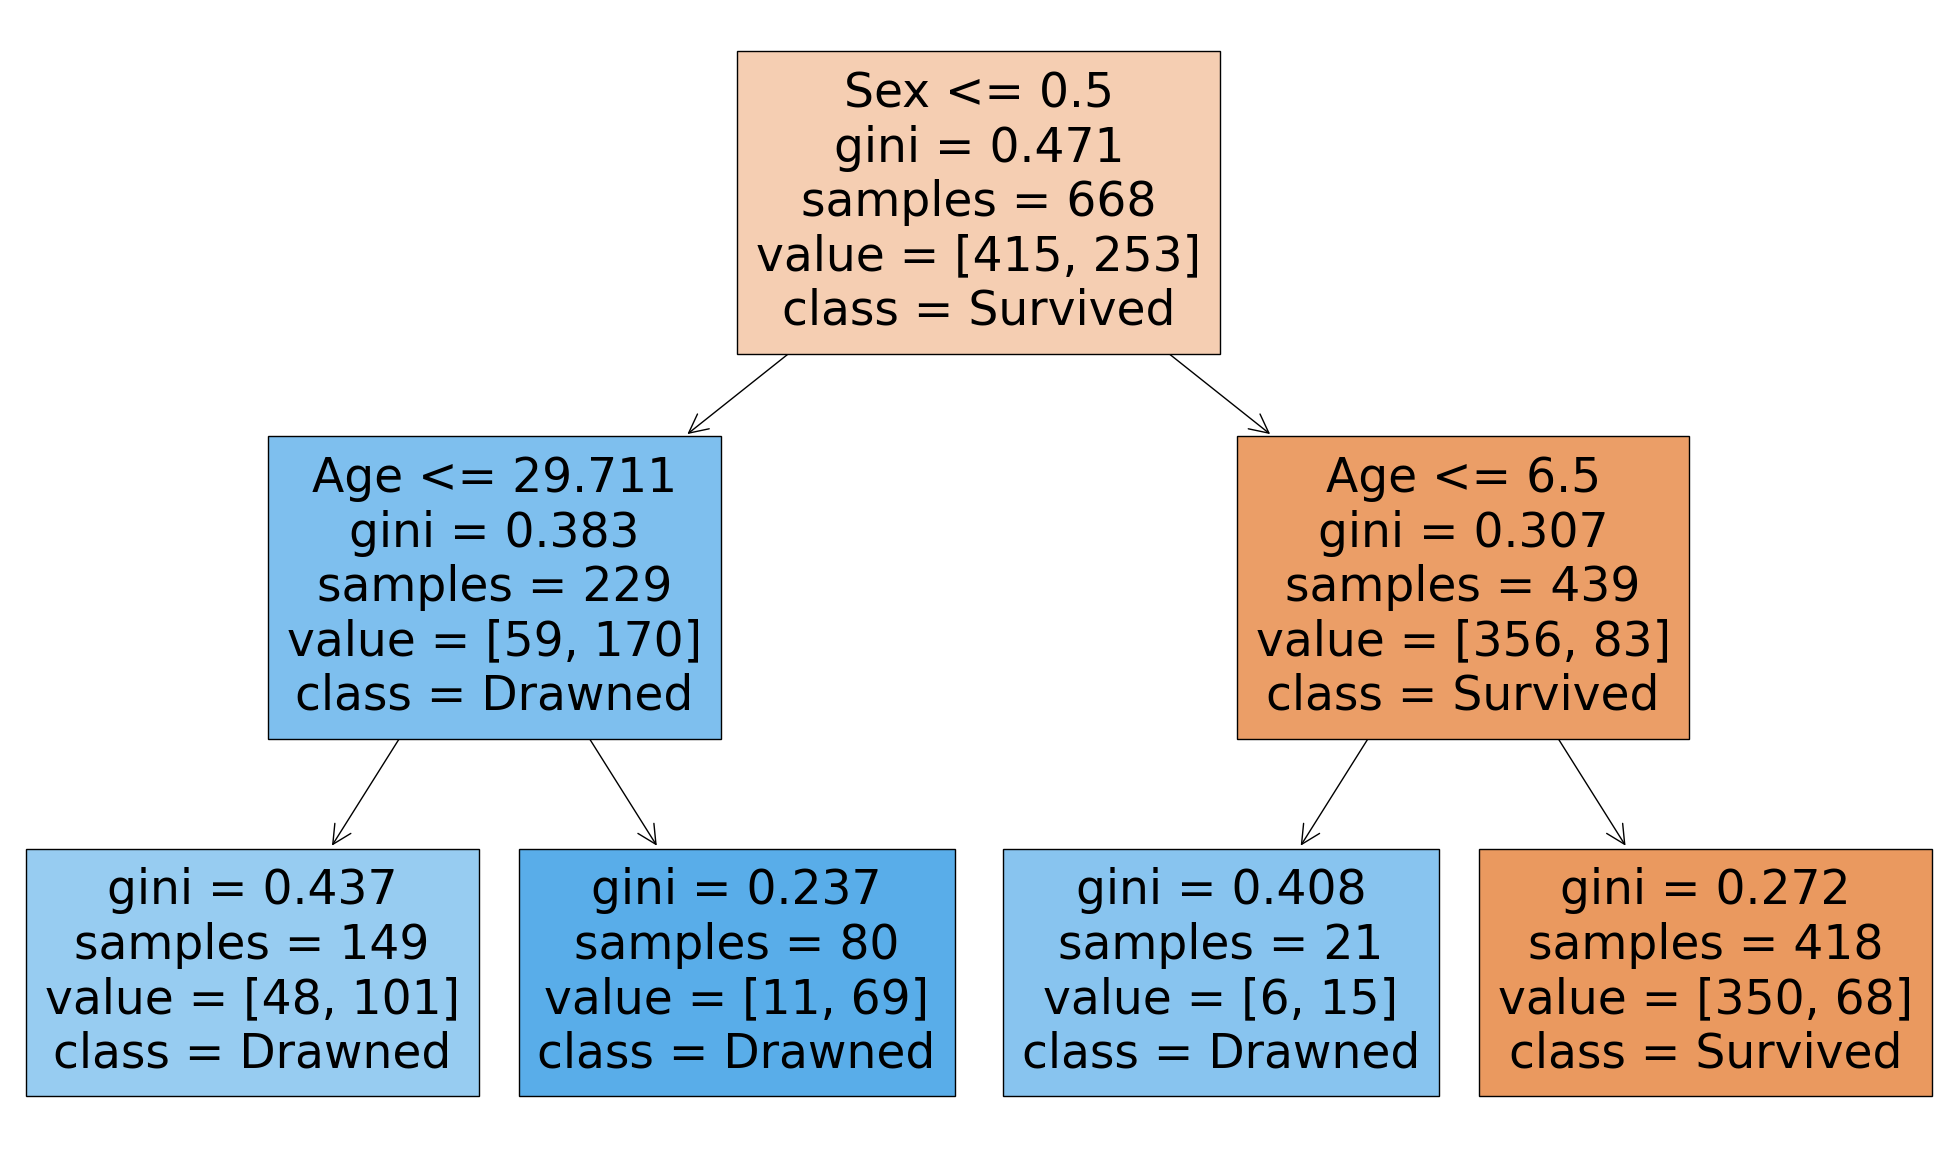

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,15))
t = plot_tree(m, feature_names=['Sex', "Age"], 
              class_names=['Survived', 'Drawned'], 
              filled=True)

In [18]:
#Cross validation for Decision Tree
cross_validation_m = cross_val_score(estimator=m, # the model to evaluate
                                     X=Xtrain_fe,
                                     y=ytrain,
                                     scoring='accuracy', # evaluation metrics
                                     cv=3, # cross validation splitting
                                     verbose=5) 

[CV] END ................................ score: (test=0.807) total time=   0.0s
[CV] END ................................ score: (test=0.762) total time=   0.0s
[CV] END ................................ score: (test=0.806) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [19]:
print(f'Validation accuracy scores: {np.round(cross_validation_m,2)}')
print(f'\nmean: {cross_validation_m.mean():.2}')
print(f'std: {cross_validation_m.std():.2}')
print(f'\nAccuracy score for the test set is: {round(m.score(Xtest_fe,ytest),3)}')

Validation accuracy scores: [0.81 0.76 0.81]

mean: 0.79
std: 0.021

Accuracy score for the test set is: 0.78
